## Airbnb RJ Short - Análise de exploração de dados

A seguinte análise de dados é da plataforma de alugueis Airbnb considerado como sendo a maior empresa hoteleira da atualidade. A empresa conecta pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática fornecendo uma plataforma inovadora para tornar essa hospedagem alternativa. A seguinte análise exploratória busca responder algumas perguntas quantos aos imoveis disponiveis para aluguel na cidade do Rio de Janeiro:

*   Qual a correlação existente entre as variáveis?
*   Qual o tipo de imóvel mais alugado no Airbnb?
*   Qual a localidade mais cara do Rio?

Os dados no dataset disponível no site da plataforma estão estruturados da seguitinte maneira:



<p>id - número de id gerado para identificar o imóvel
<p>name - nome da propriedade anunciada
<p>host_id - número de id do proprietário (anfitrião) da propriedade
<p>host_name - Nome do anfitrião
<p>neighbourhood_group - esta coluna não contém nenhum valor válido
<p>neighbourhood - nome do bairro
<p>latitude - coordenada da latitude da propriedade
<p>longitude - coordenada da longitude da propriedade
<p>room_type - informa o tipo de quarto que é oferecido
<p>price - preço para alugar o imóvel
<p>minimum_nights - quantidade mínima de noites para reservar
<p>number_of_reviews - número de reviews que a propriedade possui
<p>last_review - data do último review
<p>reviews_per_month - quantidade de reviews por mês
<p>calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
<p>availability_365 - número de dias de disponibilidade dentro de 365 dias


Perguntas a serem respondidas no dataset

<h1> Análise dos dados

In [ ]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('listings.csv')

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.965990,-43.179400,Entire home/apt,350,5,272,2022-04-23,1.87,1,311,8,NaN
1,556930647599893392,Venha passar uma pernoite em um veleiro na Urca!,198206849,Andréia,NaN,Urca,-22.947810,-43.163510,Private room,280,1,1,2022-02-19,0.25,1,365,1,NaN
2,1174007,100% Best View In Copa In Suite 2,3962758,Thiago Luiz,NaN,Copacabana,-22.972770,-43.179660,Private room,107,2,177,2022-06-07,1.69,6,357,29,NaN
3,8410797,Ipanema(Arpoador) 100mdo Mar/ Jan & Carnaval +Fev,42038091,Sheila,NaN,Ipanema,-22.988710,-43.193340,Private room,1000,3,1,2017-09-28,0.02,3,362,0,NaN
4,28053241,Navegar a Bordo de um Veleiro Francês no Rio!,193860988,Luciano,NaN,Urca,-22.950560,-43.171750,Private room,1850,2,0,NaN,NaN,1,180,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24876,649994149549663983,Apartamento encantador no centro,184987752,Tatiane,NaN,Centro,-22.908390,-43.187100,Entire home/apt,251,1,0,NaN,NaN,1,358,0,NaN
24877,650006296362728202,Apartamento encantador em Copacabana,327150319,Elisabeth,NaN,Copacabana,-22.966930,-43.181400,Entire home/apt,440,1,1,2022-06-18,1.00,2,358,1,NaN
24878,650011310811912783,Apto em frente à praia com vista lateral mar,238604267,Claudia,NaN,Barra da Tijuca,-23.009351,-43.344853,Entire home/apt,380,1,0,NaN,NaN,12,90,0,NaN
24879,650020855611122186,Apto com vista deslumbrante na Barra,238604267,Claudia,NaN,Barra da Tijuca,-23.008220,-43.343700,Entire home/apt,300,2,0,NaN,NaN,12,89,0,NaN


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,24881.00,70273060205427656.00,192419365743057696.00,17878.00,13714235.00,34495732.00,51149421.00,652906288194802176.00
host_id,24881.00,122480508.30,133110829.88,3607.00,15371748.00,68157574.00,197956877.00,464894609.00
neighbourhood_group,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,24881.00,-22.97,0.04,-23.07,-22.98,-22.97,-22.95,-22.75
longitude,24881.00,-43.25,0.10,-43.77,-43.30,-43.20,-43.19,-43.10
price,24881.00,745.40,4983.64,0.00,180.00,300.00,600.00,591723.00
minimum_nights,24881.00,5.36,26.04,1.00,1.00,2.00,4.00,1125.00
number_of_reviews,24881.00,16.82,36.86,0.00,0.00,3.00,15.00,534.00
reviews_per_month,17213.00,0.81,1.01,0.01,0.13,0.45,1.10,18.74
calculated_host_listings_count,24881.00,8.02,22.31,1.00,1.00,1.00,4.00,184.00


Valores faltantes nas colunas do dataset

In [ ]:
( df.isnull().sum() / df.shape[0]*100).sort_values(ascending = False)

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  30.818697
last_review                        30.818697
host_name                           0.470238
name                                0.084402
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

Nota-se que a coluna lincense e neighbourhood_group possuem 100% dos valores faltantes.

Explorando o tipo de distribuição das variáveis através de histogramas

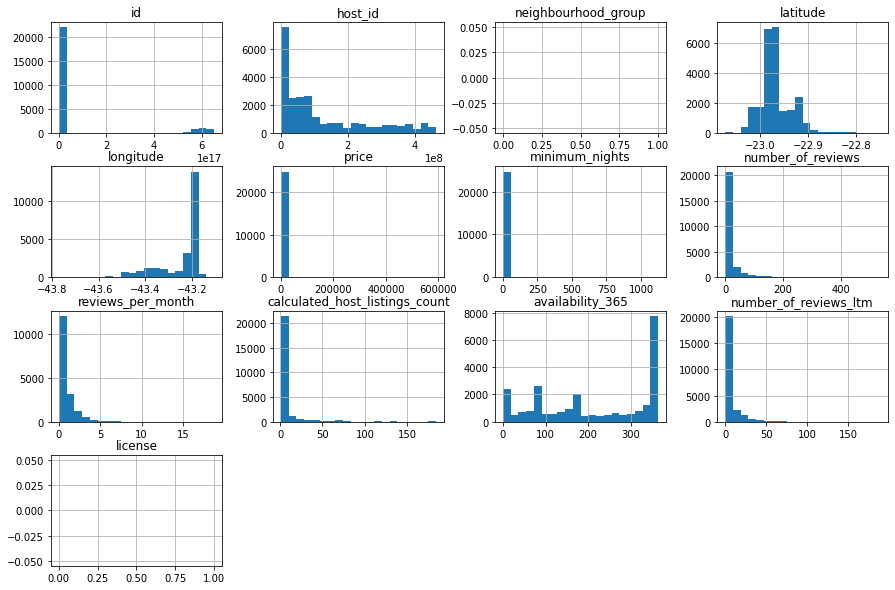

In [ ]:
df.hist(bins=20, figsize=(15,10)); 

Como visto há muitas representações de outliers, para tal é necessário que seja feita a exclusão desse valores para que não haja intereferencias nas análises finais. Alguns boxplots podem representar esses valores.
<p> Para a variável mínimo de noite, há um valor médio de 6 no e desvio padrão de 26, portanto podemos considerar tudo acima disso como outler. Mas trantado-se de uma análise de imóveis é comum que muitos usuários da plataforma coloquem seus apartamentos ou quartos para serem alugarem por períodos de até um mês. Para tal, o ideal é que se use valores acimas de 30 como outliers.

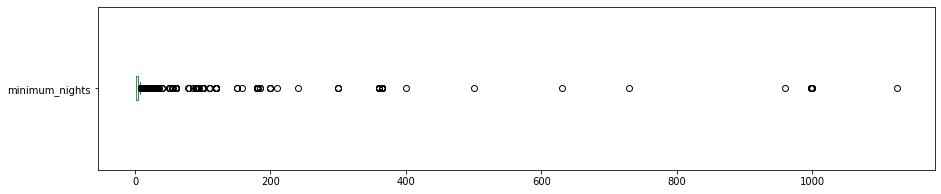

minimum_nights: valores acima de 30:
275 entradas
1.1053%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("Valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Na análise do preço tem–se valores médios aproximados de 750 e desvio padrão de 5000. Portanto, a avaliação será baseada em valores maiores que 5000.

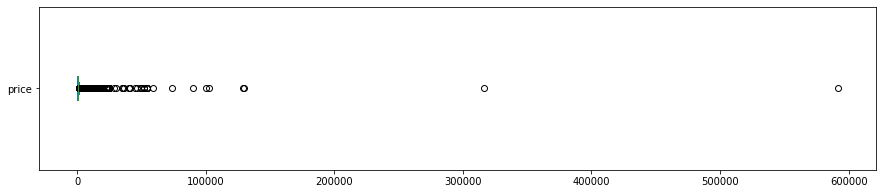

Valores acima de 30:
358 entradas
1.4388%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("Valores acima de 30:")
print("{} entradas".format(len(df[df.price > 5000])))
print("{:.4f}%".format((len(df[df.price > 5000]) / df.shape[0])*100))

Inrpretando esses valores de outliers, faz-se necessário um novo plot para averiguar a distribuição dos dados.

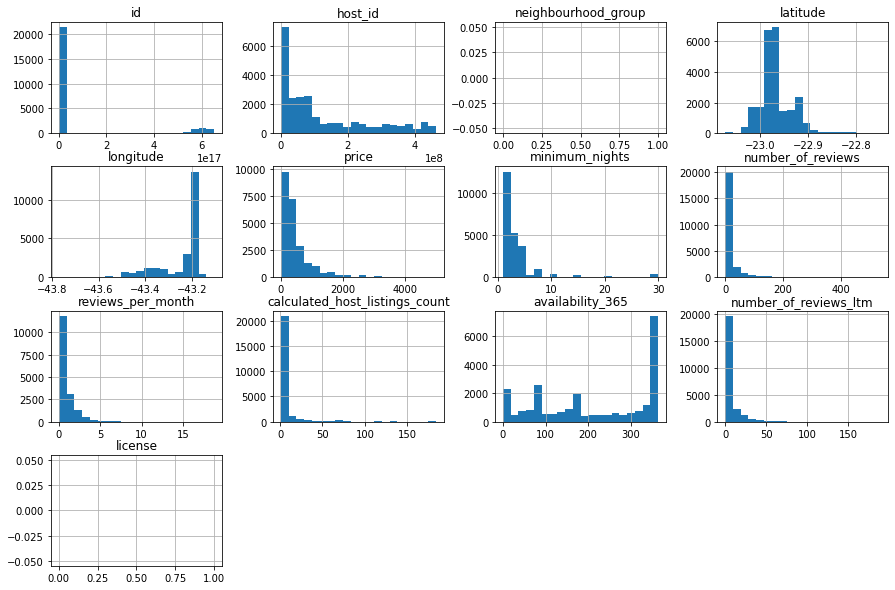

In [ ]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 5000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

df_clean.hist(bins=20, figsize=(15,10));

Verificando a correlação existente entre as variáveis.

In [ ]:
corr = df_clean.corr()
display(corr)

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,1.00,0.27,NaN,-0.03,-0.02,-0.06,-0.09,-0.15,0.22,0.02,0.06,-0.13,NaN
host_id,0.27,1.00,NaN,0.02,-0.10,-0.11,-0.10,-0.15,0.18,-0.03,0.02,0.00,NaN
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.03,0.02,NaN,1.00,0.32,-0.17,-0.03,-0.05,-0.05,-0.09,0.08,-0.06,NaN
longitude,-0.02,-0.10,NaN,0.32,1.00,-0.12,-0.03,0.11,0.03,0.07,-0.11,0.09,NaN
price,-0.06,-0.11,NaN,-0.17,-0.12,1.00,0.10,-0.15,-0.16,0.07,0.15,-0.19,NaN
minimum_nights,-0.09,-0.10,NaN,-0.03,-0.03,0.10,1.00,-0.08,-0.15,-0.06,-0.00,-0.13,NaN
number_of_reviews,-0.15,-0.15,NaN,-0.05,0.11,-0.15,-0.08,1.00,0.51,-0.05,-0.14,0.70,NaN
reviews_per_month,0.22,0.18,NaN,-0.05,0.03,-0.16,-0.15,0.51,1.00,0.01,-0.10,0.77,NaN
calculated_host_listings_count,0.02,-0.03,NaN,-0.09,0.07,0.07,-0.06,-0.05,0.01,1.00,-0.01,-0.01,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


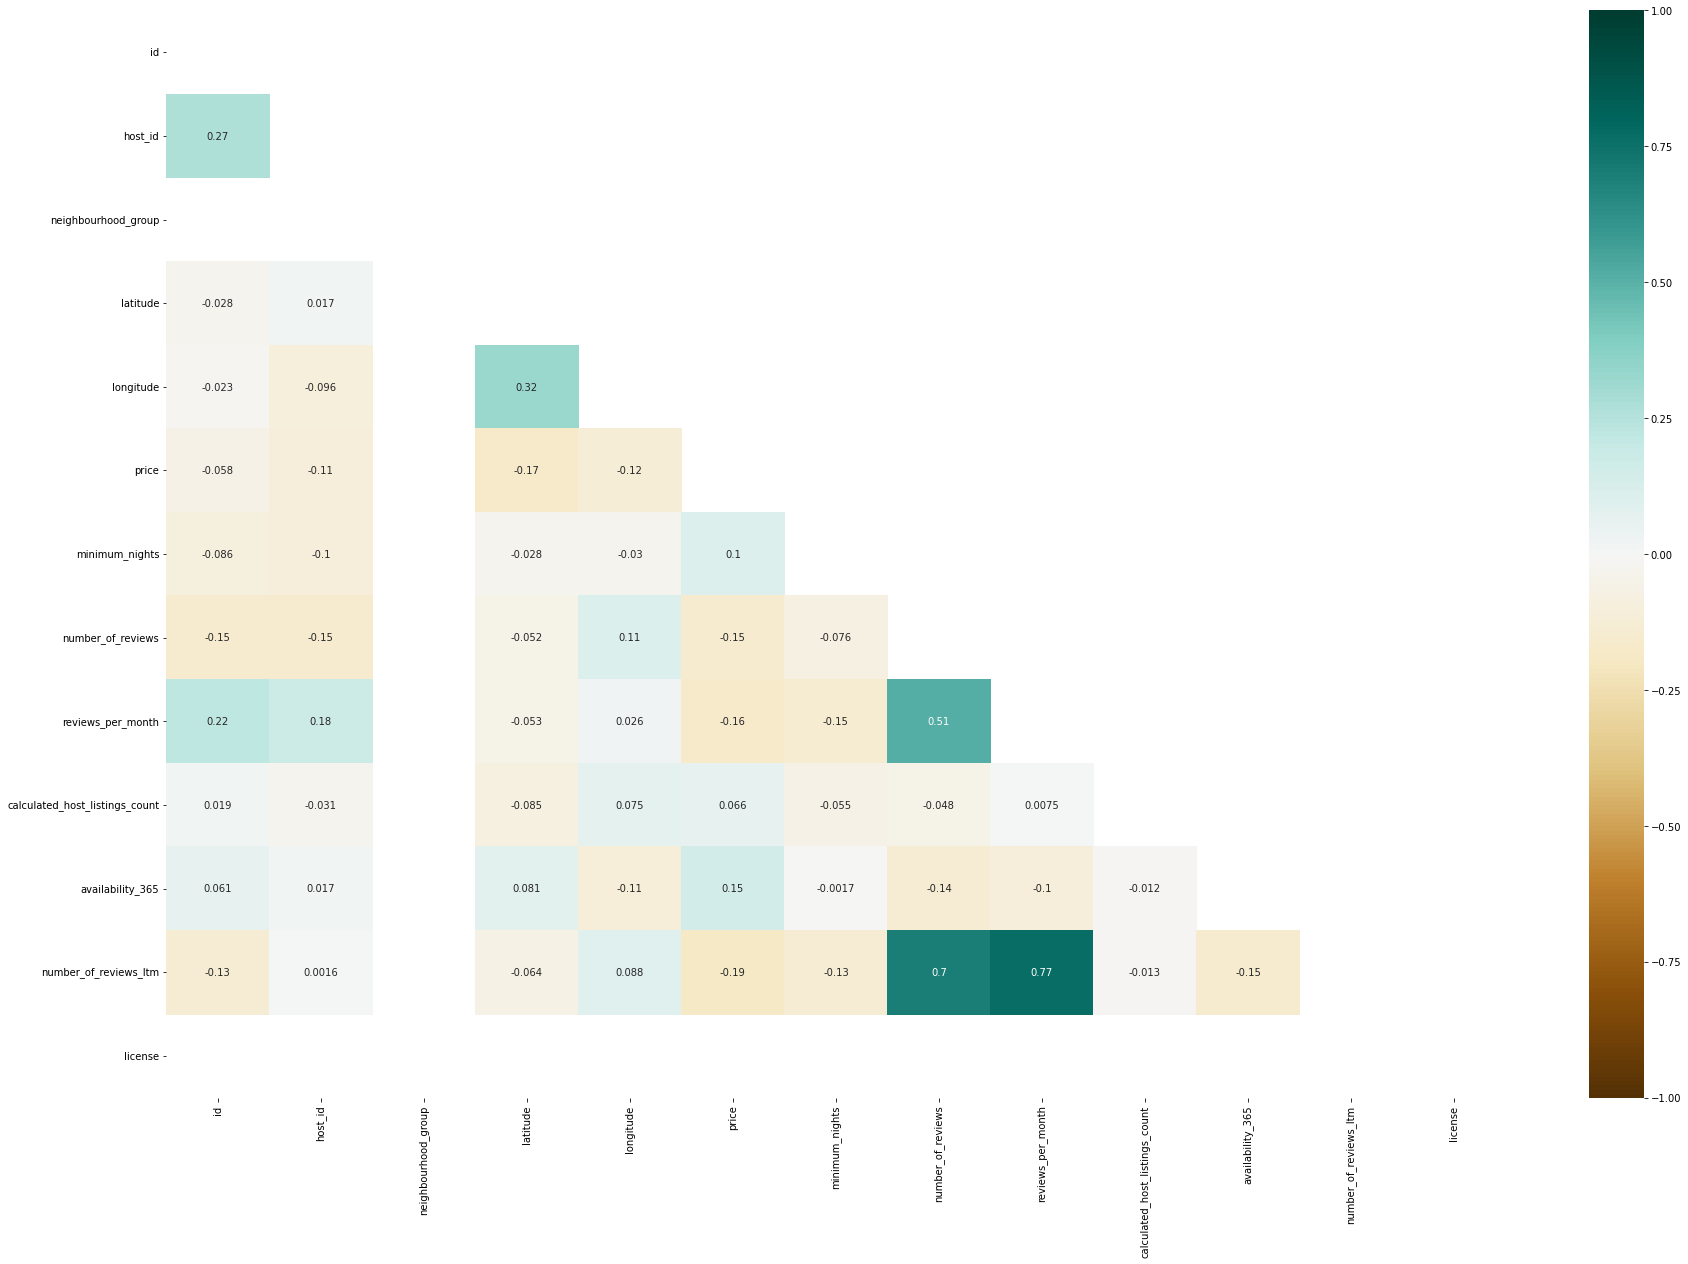

In [ ]:
plt.figure(figsize=(30, 20))
mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');

Nota-se que há algumas correlações mais fortes relacionadas reviews. No entanto, há outras mais fracas que pode representar alguma relevância. 
<p> Como foi feita a análise das correlações cuja variáveis são numéricas ainda é necessário analisar as variáveis categóricas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24881 entries, 0 to 24880
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24881 non-null  int64  
 1   name                            24860 non-null  object 
 2   host_id                         24881 non-null  int64  
 3   host_name                       24764 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   24881 non-null  object 
 6   latitude                        24881 non-null  float64
 7   longitude                       24881 non-null  float64
 8   room_type                       24881 non-null  object 
 9   price                           24881 non-null  int64  
 10  minimum_nights                  24881 non-null  int64  
 11  number_of_reviews               24881 non-null  int64  
 12  last_review                     

A ideia portanto é identificar a influência do preço nas outras variáveis. 

In [ ]:
df.room_type.value_counts()/df.price.count()*100

Entire home/apt   76.90
Private room      21.02
Shared room        1.81
Hotel room         0.27
Name: room_type, dtype: float64

Nota-se que as propridades de maior aluguel na cidade do Rio de Janeiro são do tipo apartamento inteiro. 

In [ ]:
df.neighbourhood.value_counts()/df.neighbourhood.count()*100

Copacabana                 29.58
Ipanema                    10.17
Barra da Tijuca             9.82
Leblon                      4.88
Recreio dos Bandeirantes    4.65
                            ... 
Vila Kosmos                 0.00
Jacarezinho                 0.00
Zumbi                       0.00
Barros Filho                0.00
Jardim América              0.00
Name: neighbourhood, Length: 153, dtype: float64

A vizinha que possui mais taxas de aluguel na plataforma é Copacabana seguida de Ipanema. 

In [ ]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:50]

neighbourhood
São Cristóvão              8108.78
Joá                        4131.94
Anchieta                   2719.00
São Conrado                2511.95
Itanhangá                  2155.63
Alto da Boa Vista          1680.86
Curicica                   1509.41
Cachambi                   1407.68
Leme                       1335.06
Bangu                      1246.64
Jardim Botânico            1211.38
Lagoa                      1113.68
Ribeira                    1051.00
Barra de Guaratiba         1025.62
Andaraí                    1008.44
Barra da Tijuca             986.89
Gávea                       984.62
Paciência                   968.00
Leblon                      936.24
Vila Isabel                 872.05
Vargem Grande               796.33
Vaz Lobo                    794.00
Recreio dos Bandeirantes    785.90
Cidade de Deus              782.38
Laranjeiras                 763.95
Vargem Pequena              758.72
Guaratiba                   752.18
Ipanema                     739.14
Urca  

Os bairros que possuem uma médoa de preço mais alta são os São Cristovão, Joá e Anchieta. Nota-se que a comunidade Complexo do Alemão está com média de preço proxima a Copacabana eeuqnato a Rocinha apresenta valores maiores que Copacabana. 

In [ ]:
df[df['neighbourhood']=='Rocinha'].price

337       876
1109      200
1882      103
1938       77
2046       77
2351      700
2462       77
2464       77
3257      100
11063     100
11088     100
11090     150
11306     149
12091     136
12982     100
13446    1650
14519      51
14799     180
15157     350
17590      51
17641      80
17643    3890
17822      56
18962     750
19321      80
24308    6000
24406      56
Name: price, dtype: int64

In [ ]:
df[df['neighbourhood']=='Complexo do Alemão'].price

8355    200
9205    900
Name: price, dtype: int64

No caso da comunidade Rocinha há alguns preços com valores superiores bem maiores que os demais, sendo portanto outliers nessa análise. Isso pode estar destorcendo o valor da média de preços e classificando de modo geral a Rocinha superior a bairros mais nobres como Copacabana. 
<p> Uma situação parecida acontece como Complexo do Alemão, em que há apenas dois imóveis disponíveis para aluguel na plataforma. Que portanto geram um valor de média que não representa a realidade.

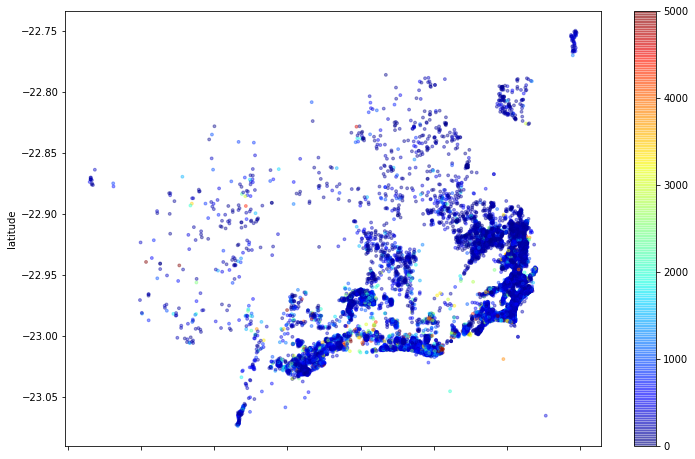

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Feita a análise superficial na base de dados do Airbnb percebeu que existem outliers em algumas das variáveis que influenciam diretamento nos resultados.
Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos. Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial.